### 1. Import Necessary Libraries

In [1]:
#loading the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 2. Read the Dataset

In [2]:
#loading the ipl matches dataset
ipl=pd.read_csv('matches.csv')

In [3]:
#having a glance at the first five records of the dataset
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### 3. Data Preprocessing

In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
#Lookin at the number of rows and columns in the dataset
ipl.shape

(756, 18)

### 4. Exploratory Data Analysis

In [8]:
categorical = [x for x in ipl.columns if ipl[x].dtype=='O'] ## list comprehension  ## checking for the datatype of the column

print('There are {} categorical variables\n'.format(len(categorical)))  ## how many categorical var are there

print('The categorical variables are :\n\n', categorical)

There are 13 categorical variables

The categorical variables are :

 ['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3']


In [9]:
#Storing all the categorical variable in X by looping function so we can easily access the categorical variables

for x in categorical:            ### for loop

    print(ipl[x].value_counts())  ## gives you the count of rows for each category of a column

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64
date
2011-04-17    2
2012-04-07    2
2011-05-05    2
2016-05-14    2
2011-05-07    2
             ..
2012-04-13    1
2012-04-11    1
2012-04-09    1
2012-04-05    1
12/05/19      1
Name: count, Length: 546, dtype: int64
team1
Mumbai Indians                 101
King

In [10]:
ipl.winner.value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [11]:
# Define a function to replace inconsistent names
def replace_inconsistent_names(column):
    ipl[column] = ipl[column].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'})

# List of columns to apply the replacement
columns_to_clean = ['team1', 'team2', 'toss_winner', 'winner']

# Apply the function to each column
for column in columns_to_clean:
    replace_inconsistent_names(column)

In [12]:
ipl.winner.value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiant          15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: count, dtype: int64

### To know the Top 5 Man of the Match Players name

In [13]:
#Getting the frequency of most man of the match awards
ipl['player_of_match'].value_counts()

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: count, Length: 226, dtype: int64

In [14]:
#Getting the top 10 players with most man of the match awards
ipl['player_of_match'].value_counts()[0:10]

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64

In [15]:
#Getting the top 5 players with most man of the match awards
ipl['player_of_match'].value_counts()[0:5]

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: count, dtype: int64

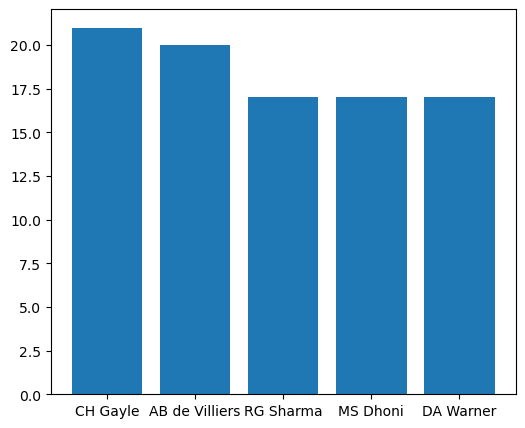

In [16]:
#making a bar-plot for the top 5 players with most man of the match awards
plt.figure(figsize=(6,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]))
plt.show()

### Analysing the Winning patterns by different attributes

In [17]:
#Getting the frequency of result column
ipl['result'].value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

In [18]:
#Finding out the number of toss wins w.r.t each team
ipl['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiant         13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: count, dtype: int64

### -Batting First

In [19]:
#Extracting the records where a team won batting first
batting_first=ipl[ipl['win_by_runs']!=0]

In [20]:
#Looking at the head
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


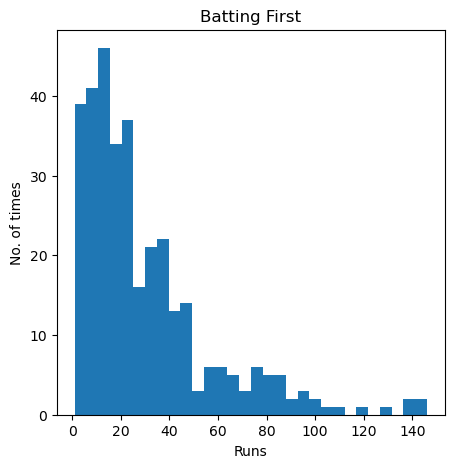

In [21]:
#Making a histogram 
plt.figure(figsize=(5,5))
plt.hist(batting_first['win_by_runs'], bins=30)
plt.xlabel('Runs')
plt.ylabel('No. of times')
plt.title('Batting First')
plt.show()

In [22]:
#Finding out the number of wins w.r.t each team after batting first
batting_first['winner'].value_counts()

winner
Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiant          7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: count, dtype: int64

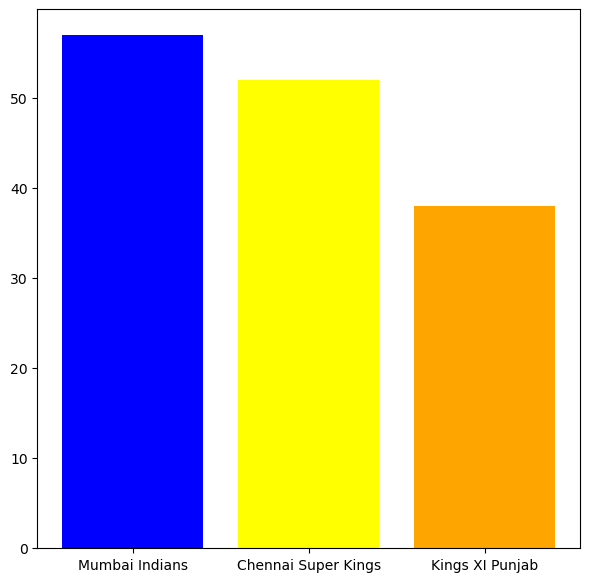

In [23]:
#Making a bar-plot for top 3 teams with most wins after batting first
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

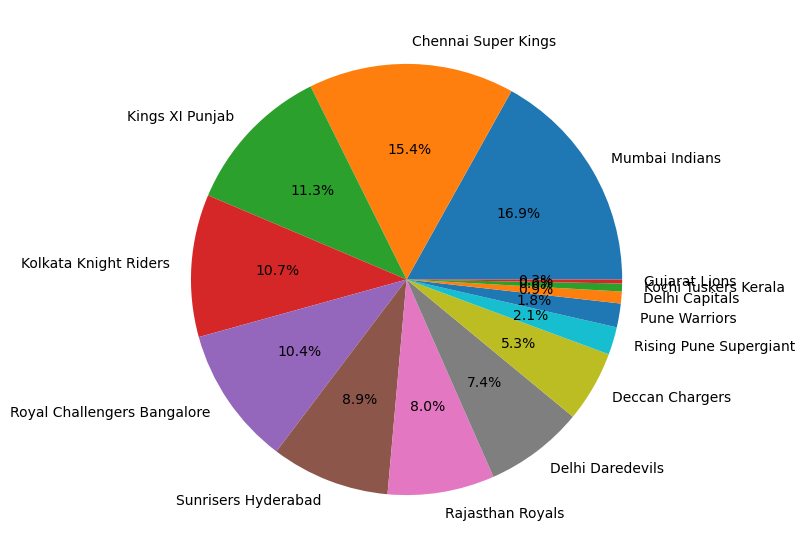

In [24]:
#Making a pie chart
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

### -Batting Second

In [25]:
#extracting those records where a team has won after batting second
batting_second=ipl[ipl['win_by_wickets']!=0]

In [26]:
#looking at the head
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


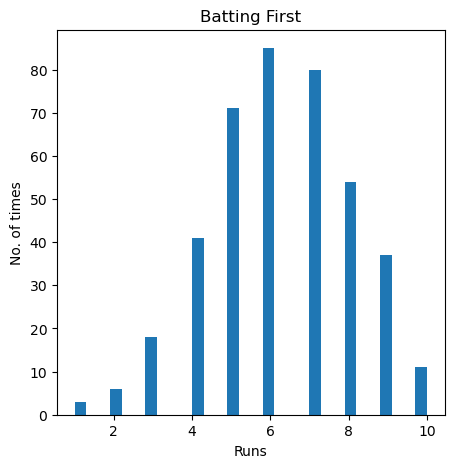

In [27]:
#Making a histogram for frequency of wins w.r.t number of wickets
plt.figure(figsize=(5,5))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.xlabel('Runs')
plt.ylabel('No. of times')
plt.title('Batting First')
plt.show()

In [28]:
#Finding out the frequency of number of wins w.r.t each time after batting second
batting_second['winner'].value_counts()

winner
Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiant          8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: count, dtype: int64

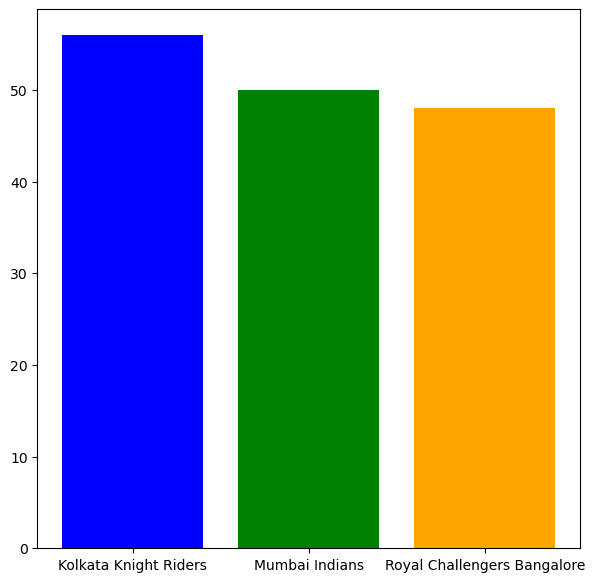

In [29]:
#Making a bar plot for top-3 teams with most wins after batting second
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["blue","green","orange"])
plt.show()

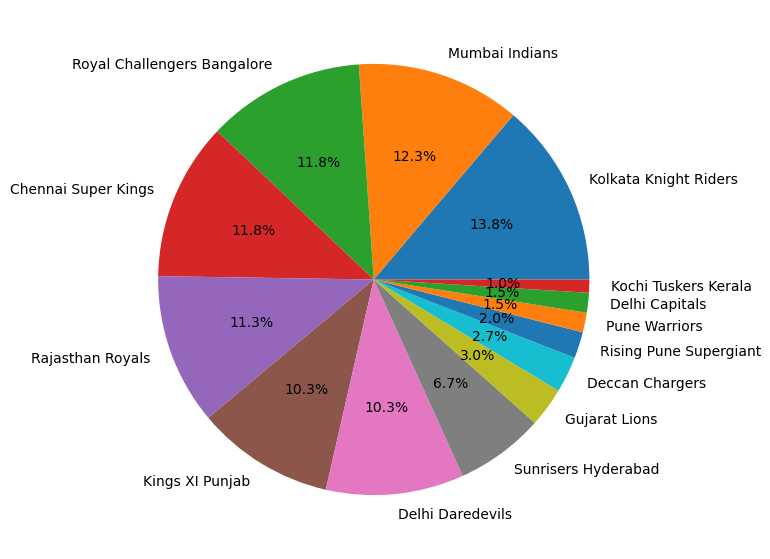

In [30]:
#Making a pie chart for distribution of most wins after batting second
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

### Analysing the Matches played

In [31]:
#Looking at the number of matches played each season
ipl['season'].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

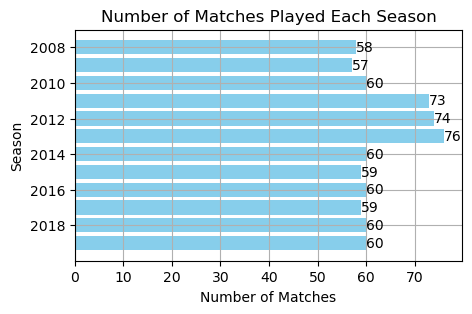

In [32]:
# Sample data (replace with your actual data)
data = {
    'season': [2013, 2012, 2011, 2010, 2014, 2016, 2018, 2019, 2017, 2015, 2008, 2009],
    'count': [76, 74, 73, 60, 60, 60, 60, 60, 59, 59, 58, 57]
}

df = pd.DataFrame(data)

# Create the barh chart
plt.figure(figsize=(5, 3))
bars = plt.barh(df['season'], df['count'], color='skyblue')

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width()}', va='center', ha='left')

plt.xlabel('Number of Matches')
plt.ylabel('Season')
plt.title('Number of Matches Played Each Season')
plt.gca().invert_yaxis()  # Invert y-axis to have seasons in descending order
plt.grid(True)
plt.show()

In [33]:
#Looking at the number of matches played in each city
ipl['city'].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

In [34]:
#Finding out how many times a team has won the match after winning the toss
np.sum(ipl['toss_winner']==ipl['winner'])

393

In [35]:
325/636

0.5110062893081762